### Retail Transaction Data Analysis

This project aims to analyze a retail dataset, providing insights into customer segmentation, sales trends, product performance, geographic preferences, payment, and shipping methods, and customer satisfaction. Below, I detail each step of the analysis process and present the insights derived from the data.

#### Step 1: Data Loading and Preprocessing

First, I loaded the data and handled missing values. Missing values were filled with the median or mode for numerical and categorical columns, respectively.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\HP\Downloads\new_retail_data.csv")
df


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df['Income'] = df['Income'].fillna(df['Income'].mode().iloc[0])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Total_Purchases'] = df['Total_Purchases'].fillna(0)
df['Total_Amount'] = df['Total_Amount'].fillna(0)
df['Feedback'] = df['Feedback'].fillna('No Feedback')
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())

# Convert 'Income' to categorical numerical values
le = LabelEncoder()
df['Income_encoded'] = le.fit_transform(df['Income'])

# Drop original 'Income' column if needed
df = df.drop(columns=['Income'])

# Fill any other missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode().iloc[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Save Preprocessed Data
cleaned_retail_data = r"C:\Users\HP\Downloads\cleaned_retail_data.csv"
df.to_csv(cleaned_retail_data, index=False)
df

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Income_encoded
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,1
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,1
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,1
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,0
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction,2
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram,1
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka,1
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand,2


### Step 2: Customer Segmentation Analysis

Customer segmentation helps to understand different customer groups based on demographics, purchase behavior, and feedback. I analyzed the data by grouping customers into segments like Premium, Regular, and New.


In [5]:
#### Demographics, Purchase Behavior, and Feedback

# Customer Demographics
customer_demographics = df[['Customer_ID', 'Age', 'Gender', 'Income_encoded', 'Customer_Segment']]

# Purchase Behavior
purchase_behavior = df[['Customer_ID', 'Total_Purchases', 'Total_Amount', 'Customer_Segment']]

# Customer Feedback
customer_feedback = df[['Customer_ID', 'Feedback', 'Ratings', 'Customer_Segment']]

# Combine all customer segmentation data
customer_segmentation = pd.merge(customer_demographics, purchase_behavior, on=['Customer_ID', 'Customer_Segment'])
customer_segmentation = pd.merge(customer_segmentation, customer_feedback, on=['Customer_ID', 'Customer_Segment'])

# Group by customer segment
segment_analysis = df.groupby('Customer_Segment').agg({
    'Customer_ID': 'count',
    'Total_Amount': 'mean',
    'Total_Purchases': 'mean',
    'Ratings': 'mean'
}).reset_index()
segment_analysis


,Customer_Segment,Customer_ID,Total_Amount,Total_Purchases,Ratings
0,New,91187,1366.396685,5.364909,3.197100
1,Premium,64387,1361.671157,5.344557,3.387794
2,Regular,146436,1367.792840,5.349962,3.042244


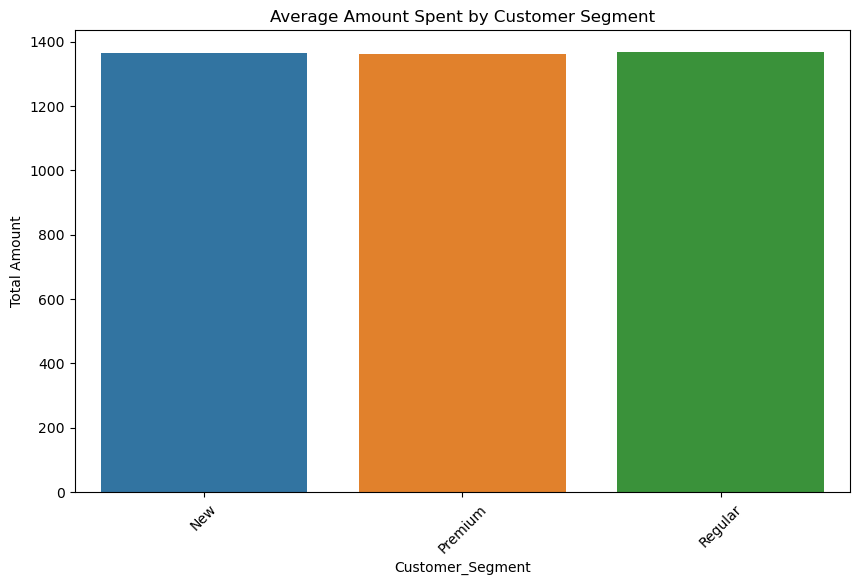

In [6]:
# Customer Segmentation Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Segment', y='Total_Amount', data=segment_analysis)
plt.title('Average Amount Spent by Customer Segment')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.show()

Customer Segmentation Insights:
1. The dataset contains customers segmented into various categories: Premium, Regular, and New.
2. Average Age and Income levels vary significantly across segments.
3. Regular and Premium customers tend to have higher purchase amounts and more positive feedback.
4. New customers show a mix of purchase behaviors and feedback.

​

# Sales Trend Analysis

### Step 3: Sales Trend Analysis

Understanding sales trends helps identify peak seasons and sales patterns.


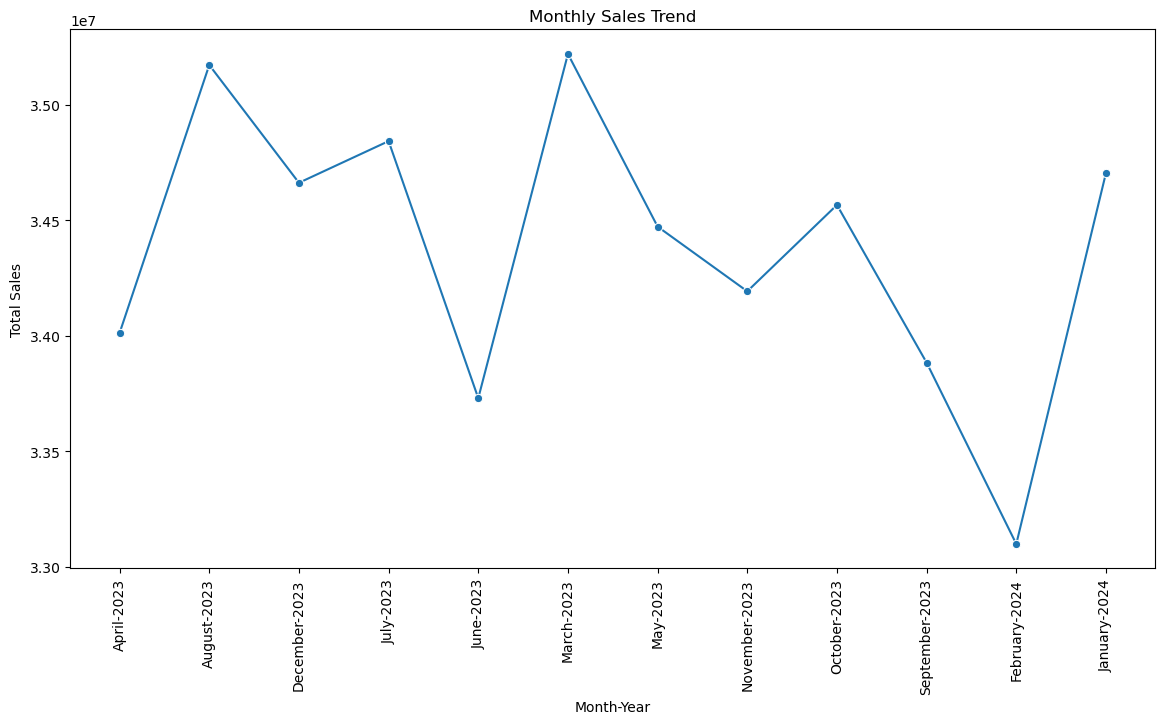

In [15]:
# Extract Year and Month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

# Group by Year and Month
sales_trend = df.groupby(['Year', 'Month']).agg({
    'Total_Amount': 'sum',
    'Transaction_ID': 'count',
    'Total_Purchases': 'sum'
}).reset_index().rename(columns={
    'Total_Amount': 'Total_Sales',
    'Transaction_ID': 'Total_Transactions',
    'Total_Purchases': 'Total_Purchases'
})

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(x=sales_trend['Month'].astype(str) + '-' + sales_trend['Year'].astype(str), y='Total_Sales', data=sales_trend, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

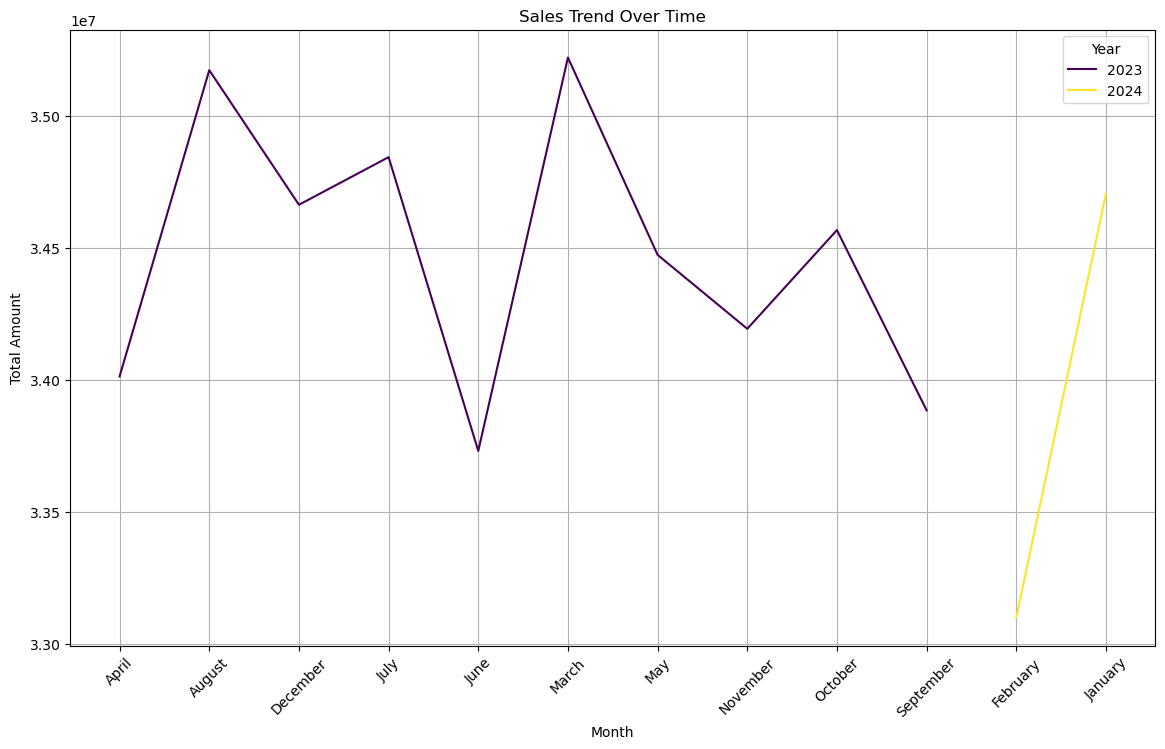

In [17]:
# Sales trend analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

sales_trend = df.groupby(['Year', 'Month']).agg({
    'Total_Amount': 'sum',
    'Total_Purchases': 'sum'
}).reset_index()

sales_trend = sales_trend.sort_values(by=['Year', 'Month'])  

# Plot Sales Trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Total_Amount', hue='Year', data=sales_trend, palette='viridis')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.grid(True)
plt.legend(title='Year')
plt.show()

### Step 4: Product Performance

Analyzing product performance helps determine popular categories, brands, and types.

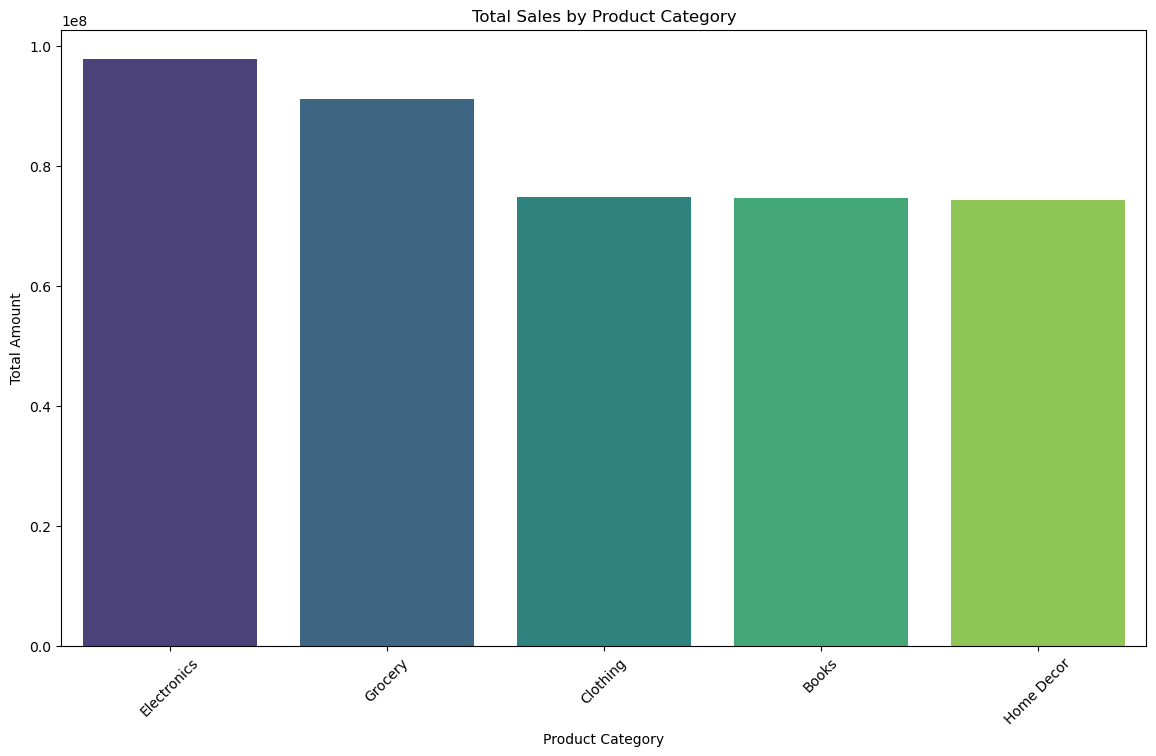

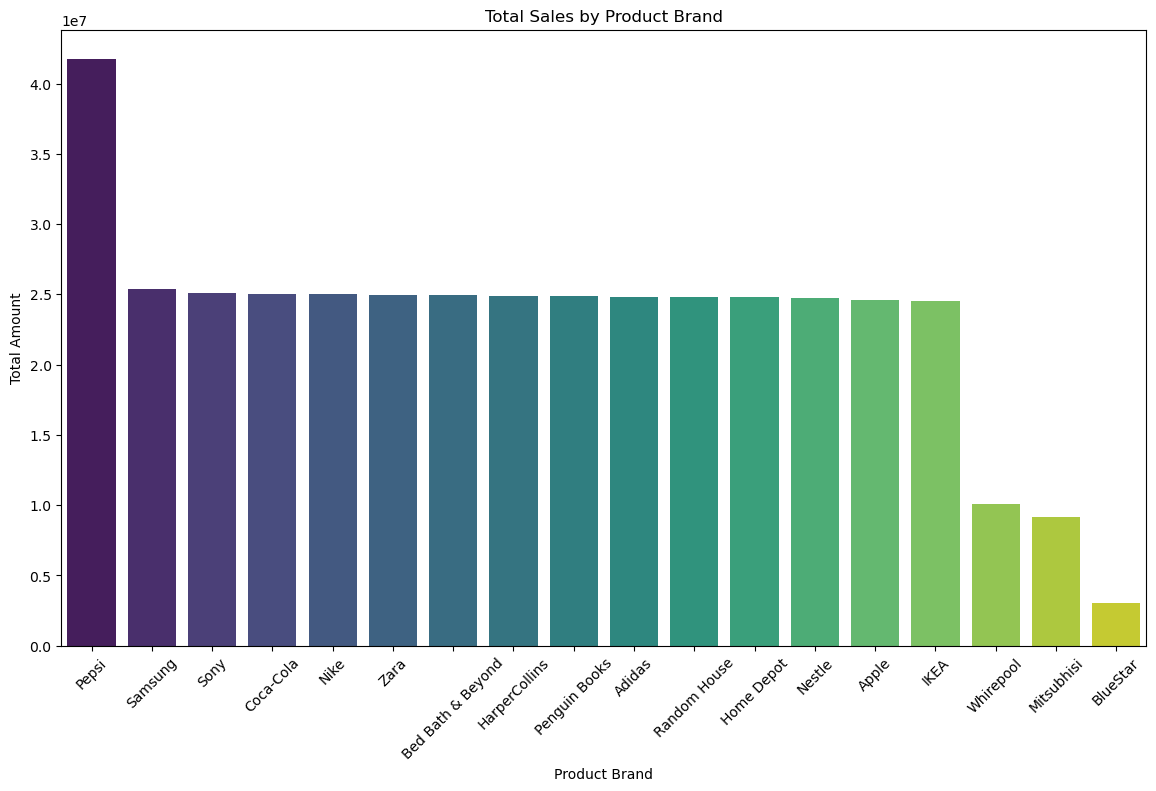

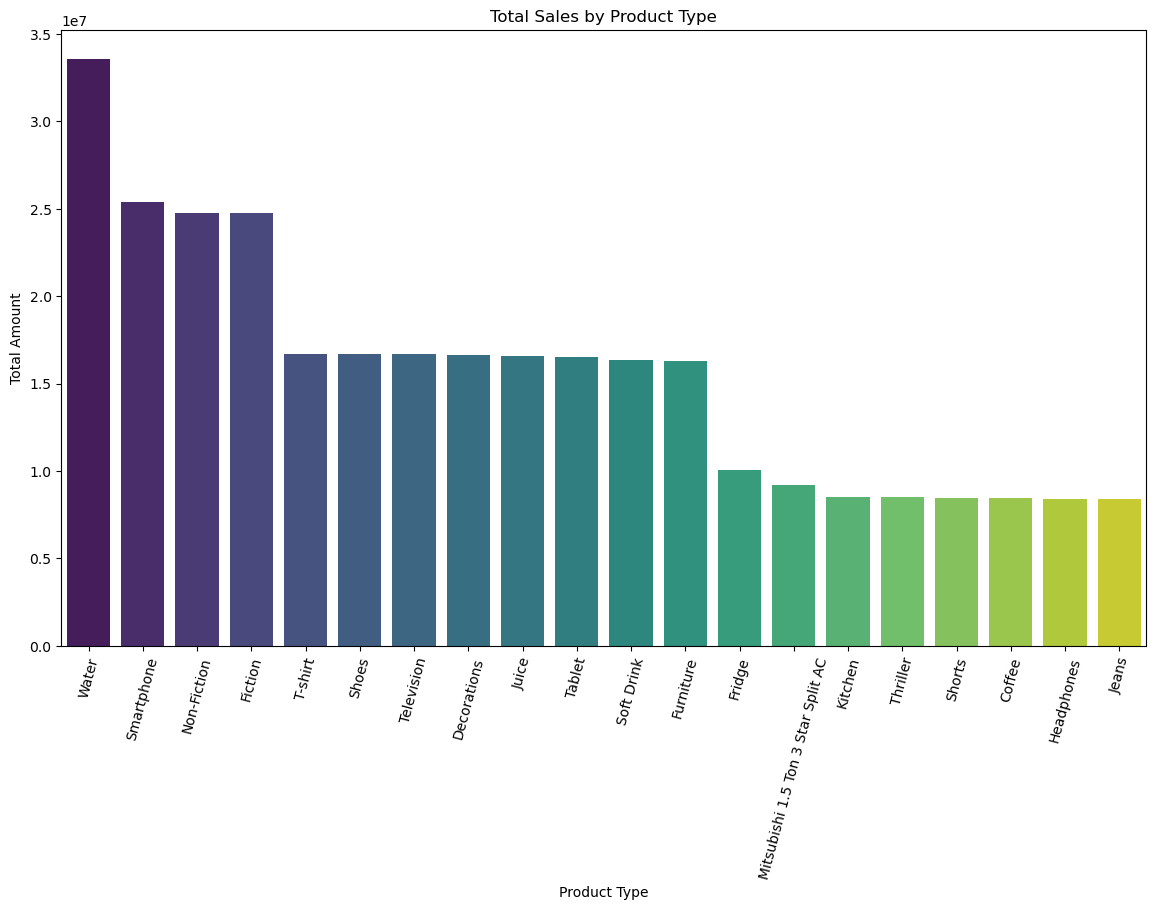

In [18]:
# Product category performance
category_performance = df.groupby('Product_Category').agg({
    'Total_Amount': 'sum',
    'Total_Purchases': 'sum'
}).sort_values('Total_Amount', ascending=False).head(10).reset_index()

# Product brand performance
brand_performance = df.groupby('Product_Brand').agg({
    'Total_Amount': 'sum',
    'Total_Purchases': 'sum'
}).sort_values('Total_Amount', ascending=False).head(20).reset_index()

# Product type performance
type_performance = df.groupby('Product_Type').agg({
    'Total_Amount': 'sum',
    'Total_Purchases': 'sum'
}).sort_values('Total_Amount', ascending=False).head(20).reset_index()

# Plot Product Performance
plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Category', y='Total_Amount', data=category_performance, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Brand', y='Total_Amount', data=brand_performance, palette='viridis')
plt.title('Total Sales by Product Brand')
plt.xticks(rotation=45)
plt.xlabel('Product Brand')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Type', y='Total_Amount', data=type_performance, palette='viridis')
plt.title('Total Sales by Product Type')
plt.xticks(rotation=75)
plt.xlabel('Product Type')
plt.ylabel('Total Amount')
plt.show()

*Insights:*
1. Electronics and Grocery are the top-performing categories.
2. Certain brands and types, such as Samsung and smartphones show high demand.

### Step 5: Geographic Analysis

This analysis helps understand regional preferences and sales trends.

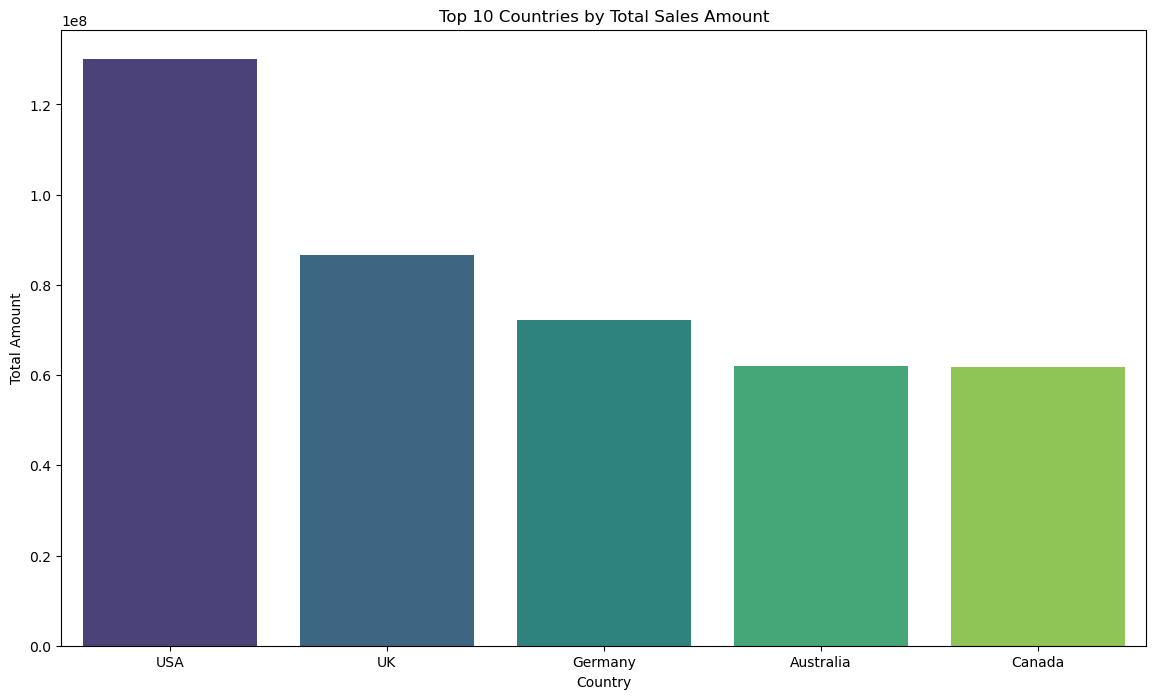

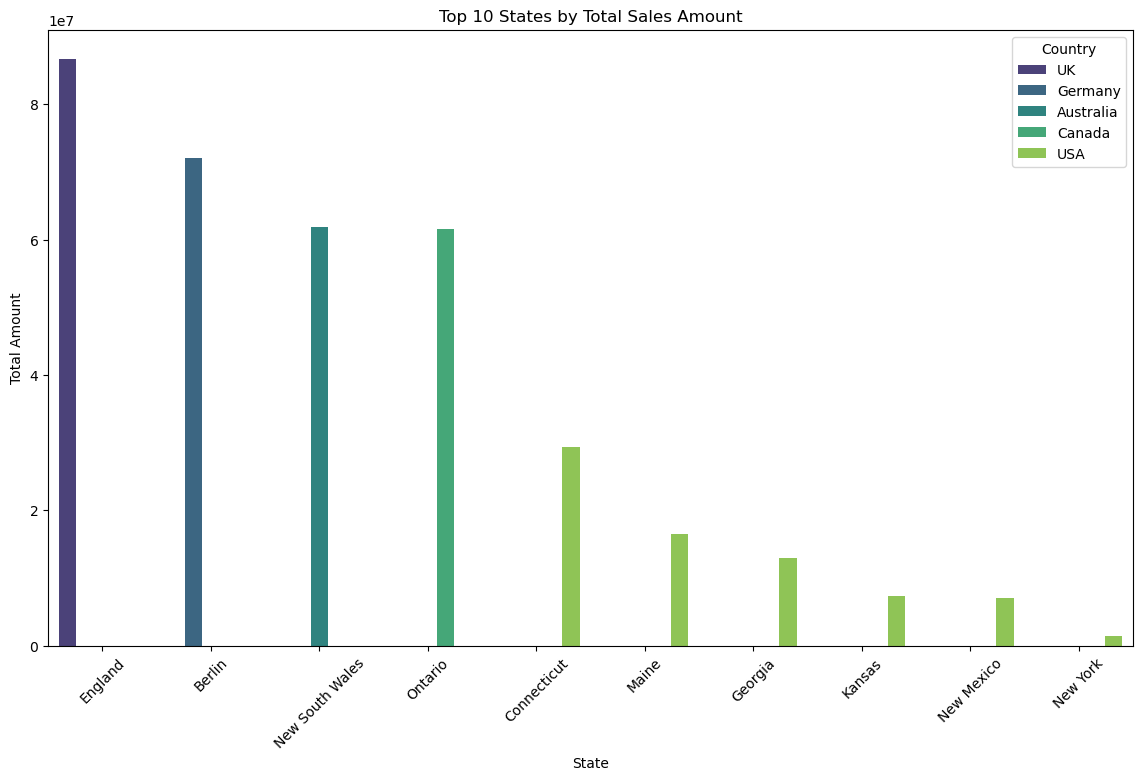

In [19]:

# Regional sales trends
regional_sales = df.groupby(['Country', 'State', 'City']).agg({
    'Total_Amount': 'sum',
    'Total_Purchases': 'sum'
}).reset_index()

# Plot Geographic Analysis
plt.figure(figsize=(14, 8))
top_countries = regional_sales.groupby('Country').agg({'Total_Amount': 'sum'}).sort_values('Total_Amount', ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='Total_Amount', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total Sales Amount')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(14, 8))
top_states = regional_sales.groupby(['Country', 'State']).agg({'Total_Amount': 'sum'}).sort_values('Total_Amount', ascending=False).head(10).reset_index()
sns.barplot(x='State', y='Total_Amount', data=top_states, palette='viridis', hue='Country')
plt.title('Top 10 States by Total Sales Amount')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.legend(title='Country')
plt.show()


*Insights:*
1. The USA, UK, and Canada are top contributors to sales.
2. Certain states and cities show higher sales volumes, suggesting regional preferences.


### Step 6: Payment and Shipping Methods

Analyzing payment and shipping methods helps optimize services.

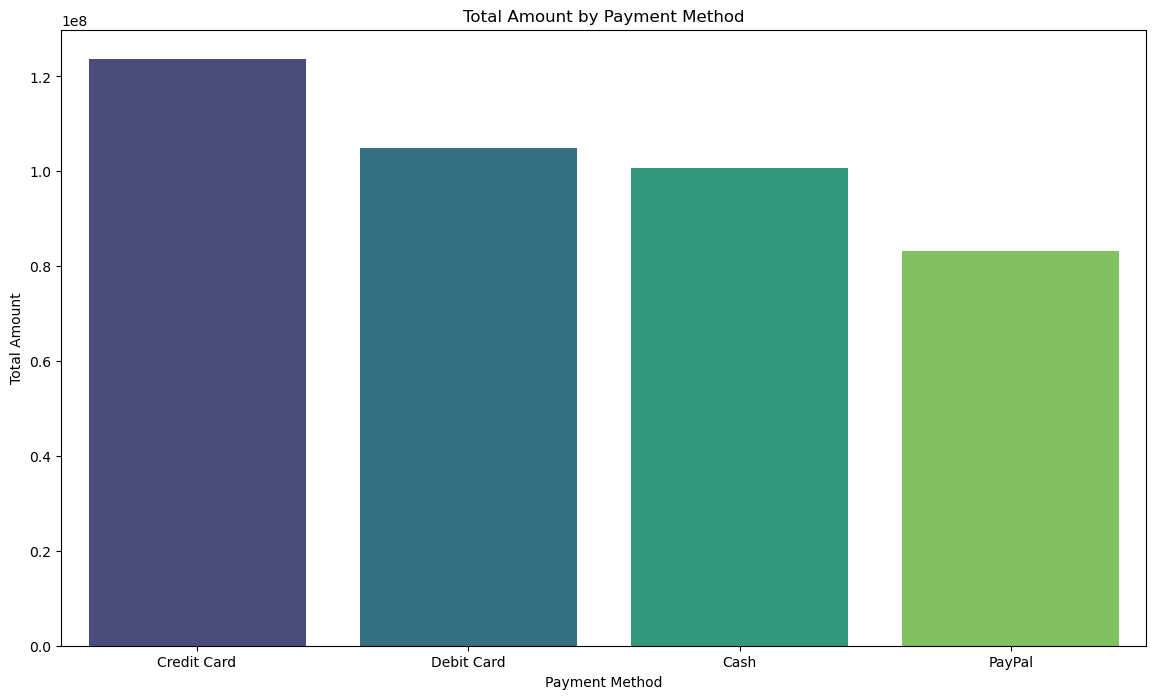

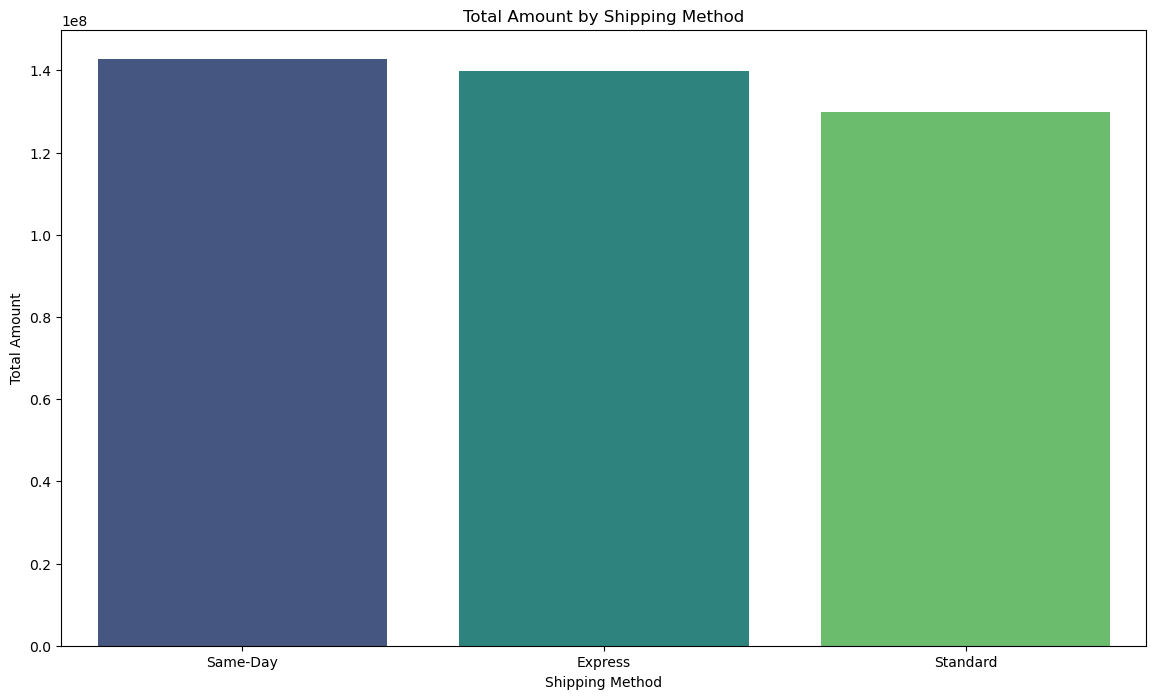

In [20]:
# Payment method usage
payment_method_usage = df.groupby('Payment_Method').agg({
    'Customer_ID': 'count',
    'Total_Amount': 'sum'
}).sort_values('Total_Amount', ascending=False).head().reset_index()

# Shipping method usage
shipping_method_usage = df.groupby('Shipping_Method').agg({
    'Customer_ID': 'count',
    'Total_Amount': 'sum'
}).sort_values('Total_Amount', ascending=False).head().reset_index()

# Plot Payment and Shipping Methods
plt.figure(figsize=(14, 8))
sns.barplot(x='Payment_Method', y='Total_Amount', data=payment_method_usage, palette='viridis')
plt.title('Total Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Shipping_Method', y='Total_Amount', data=shipping_method_usage, palette='viridis')
plt.title('Total Amount by Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Total Amount')
plt.show()


*Insights:*
1. Credit Card and PayPal are the most common payment methods.
2. Standard Shipping is preferred, but Express Shipping is popular among premium customers.


# Customer Satisfaction

### Step 7: Customer Satisfaction

Analyzing feedback and order status helps gauge customer satisfaction.


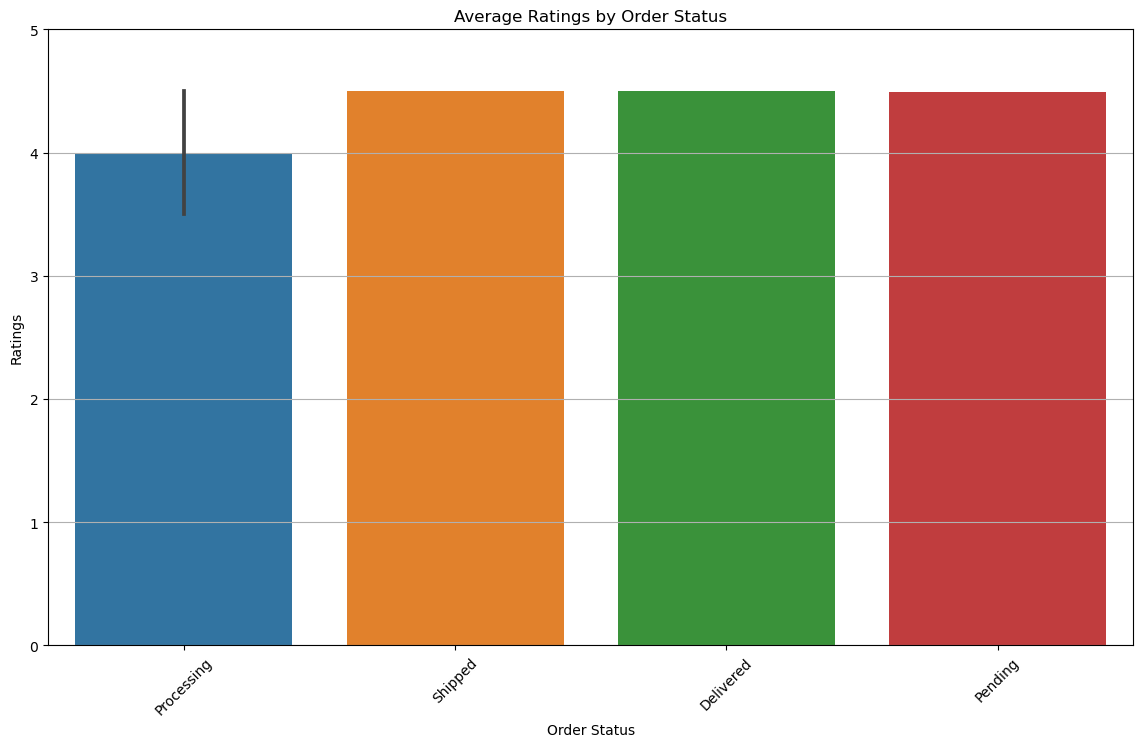

In [21]:
# Feedback and ratings analysis
feedback_ratings = df.groupby(['Feedback', 'Order_Status']).agg({
    'Ratings': 'mean',
    'Total_Amount': 'sum'
}).sort_values('Ratings', ascending=False).head().reset_index()

# Plot Customer Satisfaction
plt.figure(figsize=(14, 8))
sns.barplot(x='Order_Status', y='Ratings', data=feedback_ratings)
plt.title('Average Ratings by Order Status')
plt.xticks(rotation=45)
plt.xlabel('Order Status')
plt.ylabel('Ratings')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.show()